## Healthcare Project ##

## MIMIC-III Clinical Database 1.4 ##

## ICUSTAYS TABLE ##

**Table Description:**

-	row_id: Unique row identifier.
-	subject_id: Foreign key. Identifies the patient.
-	hadm_id: Foreign key. Identifies the hospital stay.
-	icustay_id: Primary key. Identifies the ICU stay.
-	dbsource: Source database of the item.
-	first_careunit: First careunit associated with the ICU stay.
-	last_careunit: Last careunit associated with the ICU stay.
-	first_wardid: Identifier for the first ward the patient was located in.
-	last_wardid: Identifier for the last ward the patient is located in.
-	intime: Time of admission to the ICU.
-	outtime: Time of discharge from the ICU.
-	los: Length of stay in the ICU in fractional days.

**Websites:**

https://physionet.org/content/mimiciii/1.4/

https://mimic.mit.edu/docs/iii/tables/

https://mit-lcp.github.io/mimic-schema-spy/tables/prescriptions.html

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [2]:
icustays = pd.read_csv('ICUSTAYS.csv')

In [3]:
icustays

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202
...,...,...,...,...,...,...,...,...,...,...,...,...
61527,59806,94944,143774,201233,metavision,CSRU,CSRU,15,15,2104-04-15 10:18:16,2104-04-17 14:51:00,2.1894
61528,59807,94950,123750,283653,metavision,CCU,CCU,7,7,2155-12-08 05:33:16,2155-12-10 17:24:58,2.4942
61529,59808,94953,196881,241585,metavision,SICU,SICU,57,57,2160-03-03 16:09:11,2160-03-04 14:22:33,0.9259
61530,59809,94954,118475,202802,metavision,CSRU,CSRU,15,15,2183-03-25 09:53:10,2183-03-27 17:55:03,2.3346


In [4]:
icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [5]:
# to check null values count
icustays.isnull().sum()

ROW_ID             0
SUBJECT_ID         0
HADM_ID            0
ICUSTAY_ID         0
DBSOURCE           0
FIRST_CAREUNIT     0
LAST_CAREUNIT      0
FIRST_WARDID       0
LAST_WARDID        0
INTIME             0
OUTTIME           10
LOS               10
dtype: int64

In [6]:
# to check null values percentage
(icustays.isnull().sum()/(len(icustays)))*100

ROW_ID            0.000000
SUBJECT_ID        0.000000
HADM_ID           0.000000
ICUSTAY_ID        0.000000
DBSOURCE          0.000000
FIRST_CAREUNIT    0.000000
LAST_CAREUNIT     0.000000
FIRST_WARDID      0.000000
LAST_WARDID       0.000000
INTIME            0.000000
OUTTIME           0.016252
LOS               0.016252
dtype: float64

Check null rows

In [7]:
null_rows = icustays[icustays['OUTTIME'].isnull()]
null_rows

# to further investigate patients that doesn't have 'OUTTIME'

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
1033,650,499,138066,265303,carevue,MICU,MICU,15,15,2147-01-18 19:11:00,NaN,NaN
6451,6628,5216,130232,262702,carevue,NICU,NICU,26,26,2114-02-26 05:41:00,NaN,NaN
10165,11108,8733,171006,296619,carevue,NICU,NICU,26,26,2190-02-03 07:37:00,NaN,NaN
10507,8216,6462,168585,270511,carevue,NICU,NICU,26,26,2135-04-23 10:06:00,NaN,NaN
13080,12923,10168,184129,292281,carevue,MICU,MICU,52,52,2111-03-06 20:52:00,NaN,NaN
15156,13060,10273,127370,269344,carevue,NICU,NICU,26,26,2153-02-16 21:57:00,NaN,NaN
17759,18665,14712,188201,259704,carevue,NICU,NICU,26,26,2110-01-29 23:41:00,NaN,NaN
18442,12871,10128,148324,246075,carevue,CSRU,CSRU,33,33,2117-03-29 18:58:00,NaN,NaN
27840,25343,19967,146232,234207,carevue,NICU,NICU,26,26,2168-03-02 23:40:00,NaN,NaN
29117,26451,20861,127498,206053,carevue,NICU,NICU,26,26,2136-02-20 17:31:00,NaN,NaN


Check unique values

In [8]:
icustays.nunique()

ROW_ID            61532
SUBJECT_ID        46476
HADM_ID           57786
ICUSTAY_ID        61532
DBSOURCE              3
FIRST_CAREUNIT        6
LAST_CAREUNIT         6
FIRST_WARDID         16
LAST_WARDID          17
INTIME            61531
OUTTIME           61518
LOS               40175
dtype: int64

In [9]:
# to check the unique values of each columns:
    # DBSOURCE
print(icustays['DBSOURCE'].unique())
print(icustays['DBSOURCE'].nunique())

['carevue' 'metavision' 'both']
3


In [10]:
# to check the unique values of each columns:
    # FIRST_CAREUNIT
print(icustays['FIRST_CAREUNIT'].unique())
print(icustays['FIRST_CAREUNIT'].nunique())

['MICU' 'CCU' 'NICU' 'TSICU' 'SICU' 'CSRU']
6


In [11]:
# to check the unique values of each columns:
    # LAST_CAREUNIT
print(icustays['LAST_CAREUNIT'].unique())
print(icustays['LAST_CAREUNIT'].nunique())

['MICU' 'CCU' 'SICU' 'NICU' 'TSICU' 'CSRU']
6


In [12]:
# to check the unique values of each columns:
    # FIRST_WARDID
print(icustays['FIRST_WARDID'].unique())
print(icustays['FIRST_WARDID'].nunique())

[52 57 12  7 56 15 14 23 33 50 16 22 26 37 38 47]
16


In [13]:
# to check the unique values of each columns:
    # LAST_WARDID
print(icustays['LAST_WARDID'].unique())
print(icustays['LAST_WARDID'].nunique())

[52 57 23 12  7 56 15 14 33 50 16 22 26 37 38 42 47]
17


Update columns

In [30]:
# Replace "No Record" with NaN in 'OUTTIME' column
icustays['OUTTIME'] = icustays['OUTTIME'].replace('No Record', np.nan)

Update date/time columns into 'datetime' format/type

In [14]:
# to update column data type to datetime
to_datetime = ['INTIME', 'OUTTIME']

for col in to_datetime:
    icustays[col] = pd.to_datetime(icustays[col])

In [15]:
# to update columns to string
to_string = ['ROW_ID', 'SUBJECT_ID', 'HADM_ID',
             'ICUSTAY_ID', 'FIRST_WARDID', 'LAST_WARDID']

for col in to_string:
    icustays[col]  = icustays[col].astype("str")

Summary Statistics

In [28]:
icustays.describe()

,INTIME,OUTTIME,LOS,INTIME_Year,OUTTIME_Year
count,61532,61522,61522.000000,61532.000000,61522.000000
mean,2151-03-20 13:56:55.438065664,2151-03-26 06:26:52.360471552,4.917972,2150.715758,2150.731982
min,2100-06-07 20:00:22,2100-06-08 14:59:31,0.000100,2100.000000,2100.000000
25%,2126-03-01 09:44:44,2126-03-04 23:55:48,1.108025,2126.000000,2126.000000
50%,2151-01-07 22:00:42.499999744,2151-01-15 01:11:17.999998976,2.092250,2151.000000,2151.000000
75%,2176-07-07 22:16:04.499999744,2176-07-11 19:28:33.749999616,4.483175,2176.000000,2176.000000
max,2210-08-18 12:34:24,2210-08-20 18:35:13,173.072500,2210.000000,2210.000000
std,NaN,NaN,9.638784,29.135718,29.135916


Plotting numeric variable/s

LOS


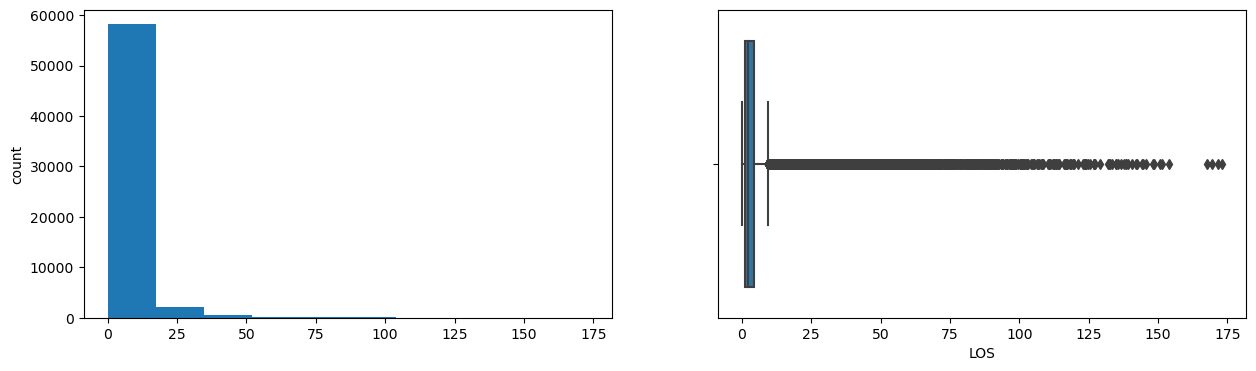

In [16]:
num_cols = ['LOS']

for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    icustays[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=icustays[col])
    plt.show()

Plotting categorical variables

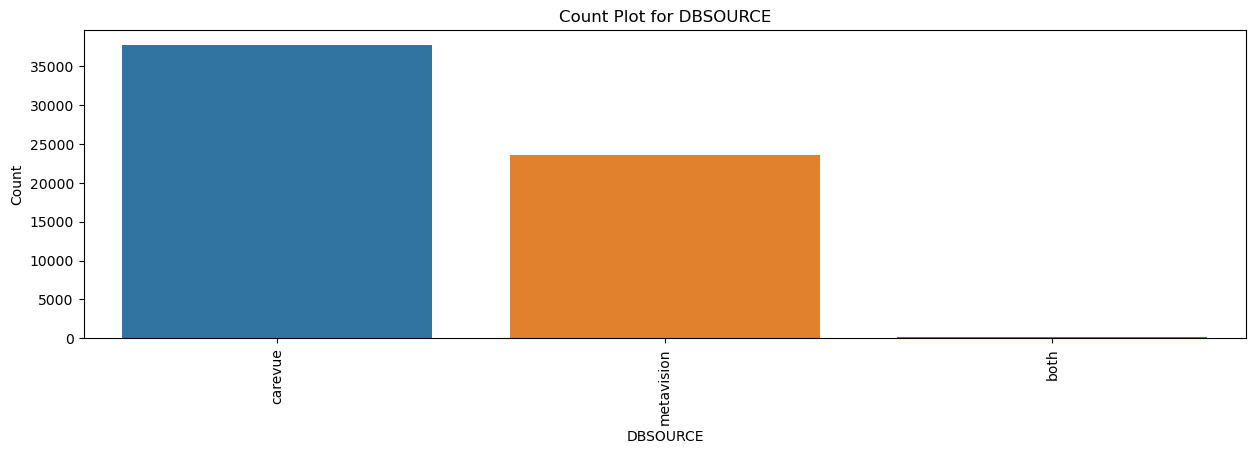

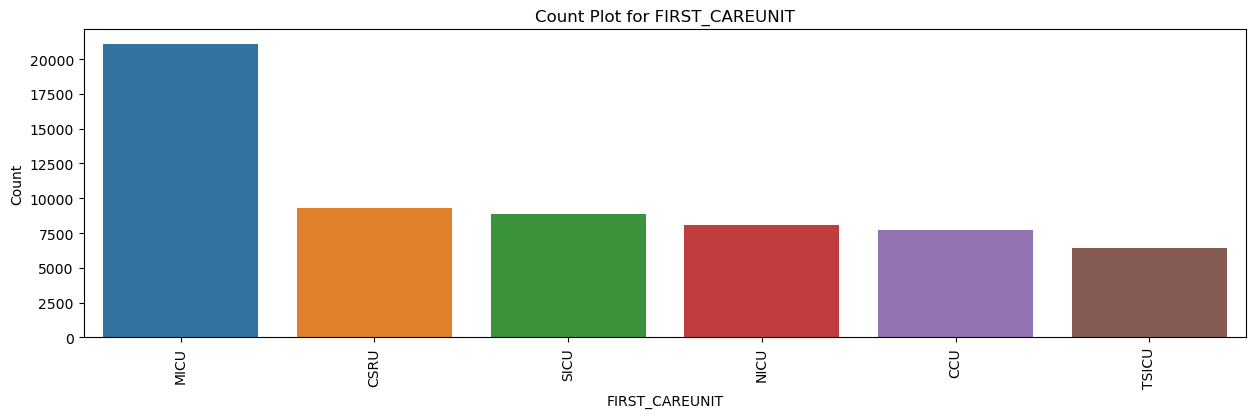

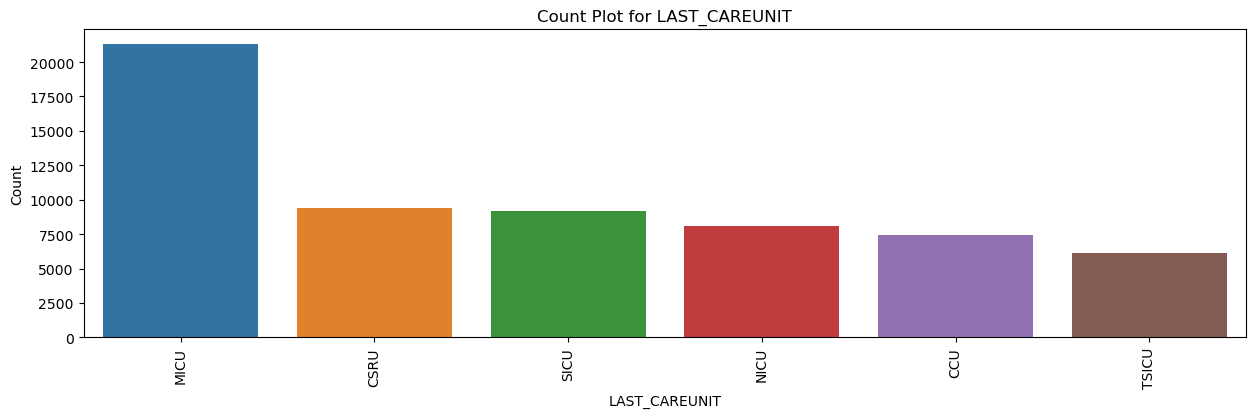

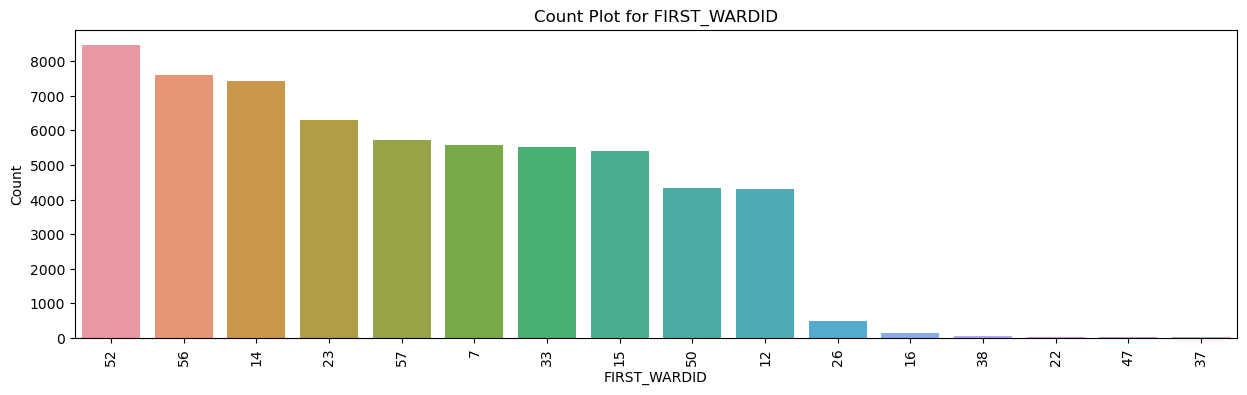

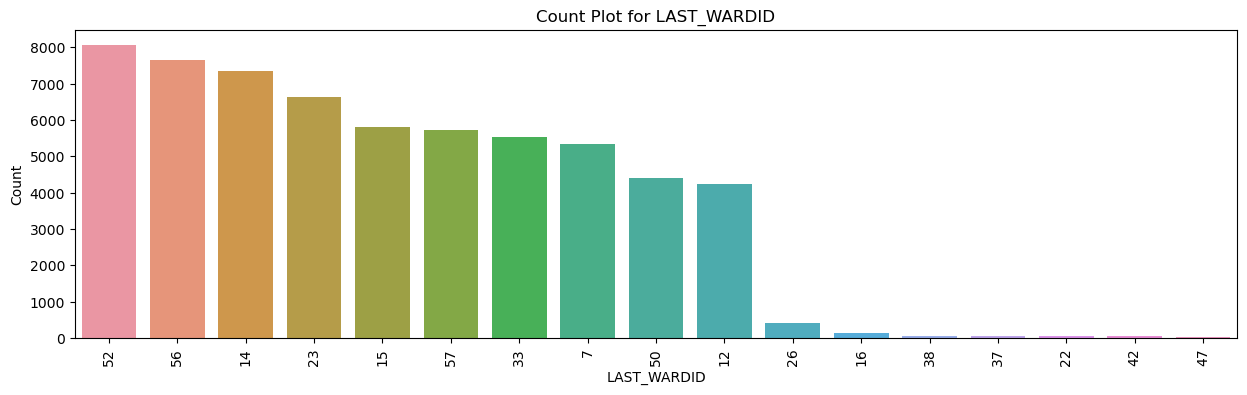

In [17]:
cat_cols = ['DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID']

for col in cat_cols:
    plt.figure(figsize=(15, 4))
    sns.countplot(x=col, data=icustays, order=icustays[col].value_counts().index)
    plt.ylabel('Count')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

Plotting LOS

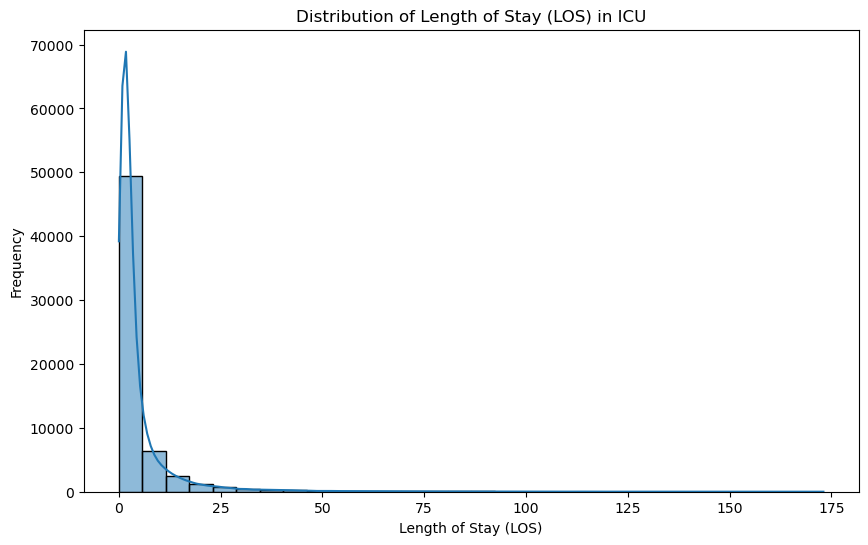

Average LOS: 4.91797158089789
Median LOS: 2.09225
Maximum LOS: 173.0725


In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(icustays['LOS'], bins=30, kde=True)
plt.title('Distribution of Length of Stay (LOS) in ICU')
plt.xlabel('Length of Stay (LOS)')
plt.ylabel('Frequency')
plt.show()

# Display statistics
print("Average LOS:", icustays['LOS'].mean())
print("Median LOS:", icustays['LOS'].median())
print("Maximum LOS:", icustays['LOS'].max())

Export clean data

In [33]:
# to export clean data file
csv_path = 'icustays_clean.csv'
icustays.to_csv(csv_path,
                  index = False)